In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings("ignore")

In [66]:
df = pd.read_csv("dataset.csv")

In [67]:
df.head()

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($)
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,2673.07
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,751.17
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,2059.83


In [68]:
df.tail(10)

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($)
11758,Samsung,Intel i5,8,512GB SSD,Nvidia RTX 2060,14.0,1366x768,11.3,2.24,Linux,929.32
11759,Lenovo,AMD Ryzen 9,32,1TB SSD,Nvidia RTX 3060,16.0,2560x1440,7.1,2.98,macOS,3696.04
11760,HP,AMD Ryzen 3,8,1TB SSD,AMD Radeon RX 6600,13.3,1920x1080,10.3,3.36,macOS,950.07
11761,Dell,Intel i3,64,1TB SSD,AMD Radeon RX 6600,17.3,2560x1440,11.5,1.93,Windows,2683.44
11762,Apple,AMD Ryzen 9,16,1TB HDD,AMD Radeon RX 6600,15.6,1920x1080,10.9,1.55,FreeDOS,2704.23
11763,Acer,Intel i3,4,2TB SSD,Nvidia RTX 2060,17.3,1366x768,11.5,1.58,macOS,704.82
11764,Asus,Intel i3,4,2TB SSD,AMD Radeon RX 6800,16.0,1366x768,9.5,2.14,Linux,775.59
11765,Razer,AMD Ryzen 9,4,2TB SSD,AMD Radeon RX 6600,15.6,2560x1440,8.2,2.05,Linux,2789.46
11766,Samsung,AMD Ryzen 7,16,512GB SSD,Integrated,13.3,1920x1080,7.5,1.48,macOS,1067.13
11767,Samsung,Intel i7,8,256GB SSD,Nvidia RTX 3080,17.3,2560x1440,6.4,2.45,FreeDOS,1579.55


In [69]:
print(f"Rows: {df.shape[0]} | Columns: {df.shape[1]}")

Rows: 11768 | Columns: 11


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11768 entries, 0 to 11767
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 11768 non-null  object 
 1   Processor             11768 non-null  object 
 2   RAM (GB)              11768 non-null  int64  
 3   Storage               11768 non-null  object 
 4   GPU                   11768 non-null  object 
 5   Screen Size (inch)    11768 non-null  float64
 6   Resolution            11768 non-null  object 
 7   Battery Life (hours)  11768 non-null  float64
 8   Weight (kg)           11768 non-null  float64
 9   Operating System      11768 non-null  object 
 10  Price ($)             11768 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 1011.4+ KB


In [71]:
df.isna().sum()

Brand                   0
Processor               0
RAM (GB)                0
Storage                 0
GPU                     0
Screen Size (inch)      0
Resolution              0
Battery Life (hours)    0
Weight (kg)             0
Operating System        0
Price ($)               0
dtype: int64

In [72]:
df.duplicated().sum()


0

In [73]:
df.nunique()

Brand                      10
Processor                   8
RAM (GB)                    5
Storage                     5
GPU                         7
Screen Size (inch)          5
Resolution                  4
Battery Life (hours)       81
Weight (kg)               231
Operating System            4
Price ($)               11558
dtype: int64

In [74]:
df.describe()

,RAM (GB),Screen Size (inch),Battery Life (hours),Weight (kg),Price ($)
count,11768.000000,11768.000000,11768.000000,11768.000000,11768.000000
mean,24.852821,15.212305,8.027855,2.341117,2183.571608
std,21.762567,1.436997,2.305400,0.667921,1316.886132
min,4.000000,13.300000,4.000000,1.200000,279.570000
25%,8.000000,14.000000,6.000000,1.760000,1272.045000
50%,16.000000,15.600000,8.000000,2.340000,1840.865000
75%,32.000000,16.000000,10.000000,2.910000,2698.370000
max,64.000000,17.300000,12.000000,3.500000,10807.880000


In [75]:
df.dtypes

Brand                    object
Processor                object
RAM (GB)                  int64
Storage                  object
GPU                      object
Screen Size (inch)      float64
Resolution               object
Battery Life (hours)    float64
Weight (kg)             float64
Operating System         object
Price ($)               float64
dtype: object

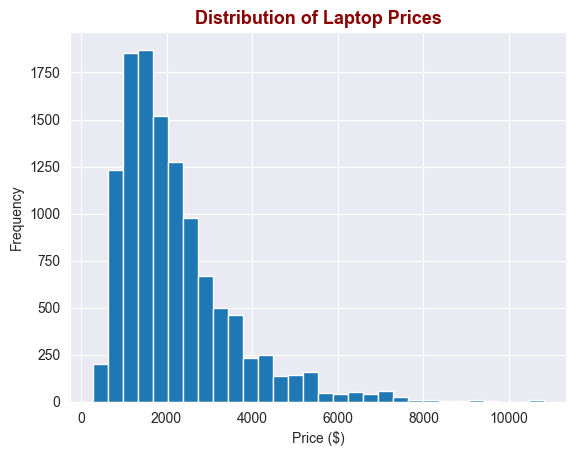

In [76]:
plt.hist(df['Price ($)'], bins=30)
plt.title('Distribution of Laptop Prices',
          fontsize=13,
          fontweight="bold",
          color="darkred")
plt.xlabel('Price ($)', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.show()


In [77]:
df['Brand'].value_counts().index

Index(['Apple', 'HP', 'MSI', 'Microsoft', 'Dell', 'Asus', 'Acer', 'Samsung',
       'Lenovo', 'Razer'],
      dtype='object', name='Brand')

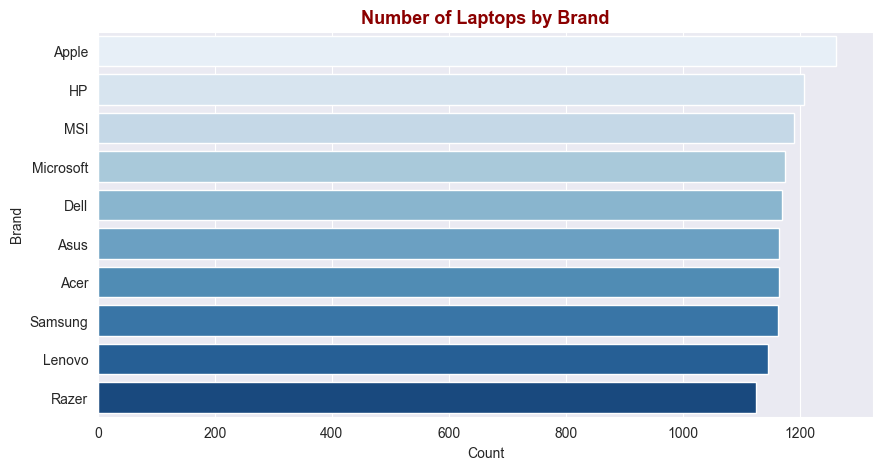

In [78]:
plt.figure(figsize=(10,5))
sns.countplot(y=df['Brand'], order=df['Brand'].value_counts().index, palette='Blues')

plt.title('Number of Laptops by Brand',
          fontsize=13,
          fontweight="bold",
          color="darkred")
plt.xlabel('Count', fontsize=10)
plt.ylabel('Brand', fontsize=10)
plt.show()

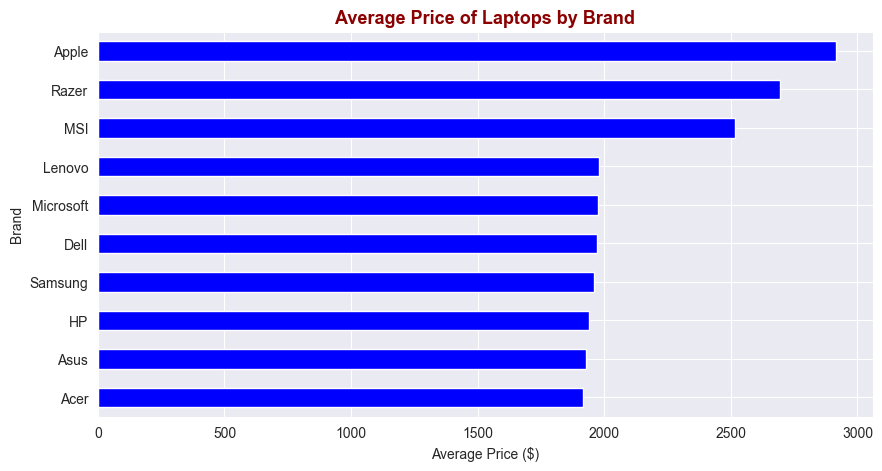

In [79]:
df_brand_price = df.groupby("Brand")["Price ($)"].mean().sort_values()
df_brand_price.plot(kind='barh',figsize=(10,5),color = 'blue')
plt.title('Average Price of Laptops by Brand',
        fontsize=13,
        fontweight="bold",
        color="darkred")
plt.xlabel('Average Price ($)', fontsize=10)
plt.ylabel('Brand', fontsize=10)
plt.show()

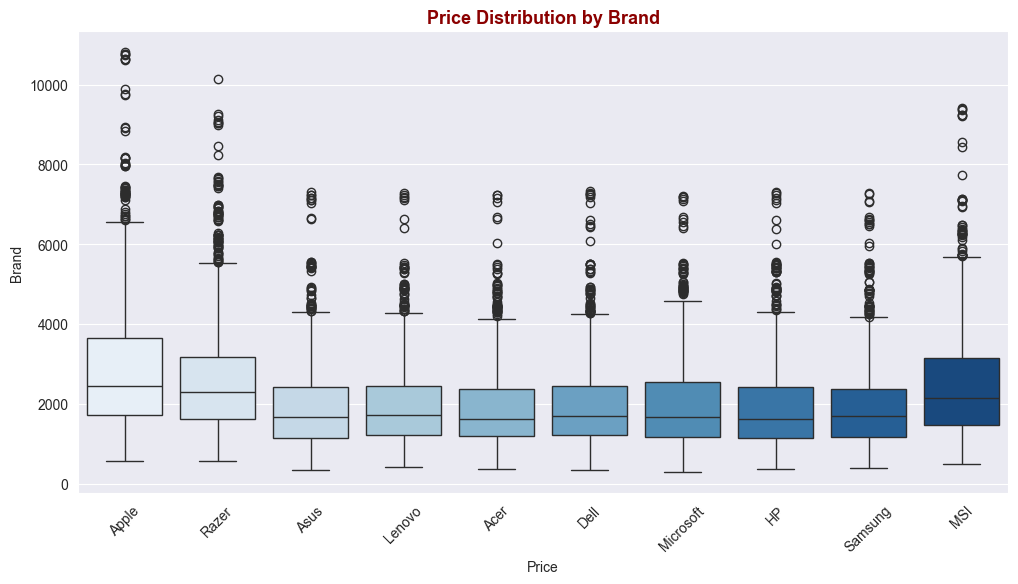

In [80]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Brand", y="Price ($)", data=df, palette='Blues')
plt.xticks(rotation=45)
plt.title('Price Distribution by Brand',
          fontsize=13,
          fontweight="bold",
          color="darkred")
plt.xlabel("Price", fontsize=10)
plt.ylabel("Brand", fontsize=10)
plt.show()

In [81]:
numeric_col = df.select_dtypes(include=["number"]).columns
numeric_col


Index(['RAM (GB)', 'Screen Size (inch)', 'Battery Life (hours)', 'Weight (kg)',
       'Price ($)'],
      dtype='object')

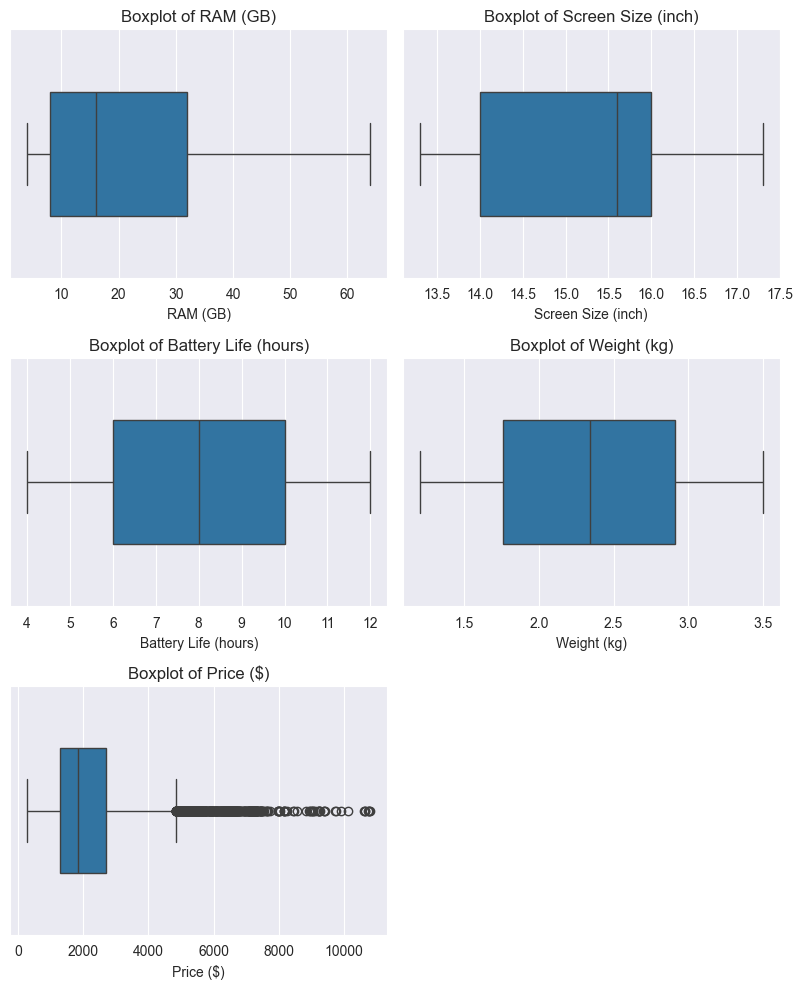

In [82]:
numeric_col = df.select_dtypes(include=["number"]).columns

plt.figure(figsize=(8, 10))
sns.set_style('darkgrid')

for i, col in enumerate(numeric_col, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df[col], width=0.5)
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

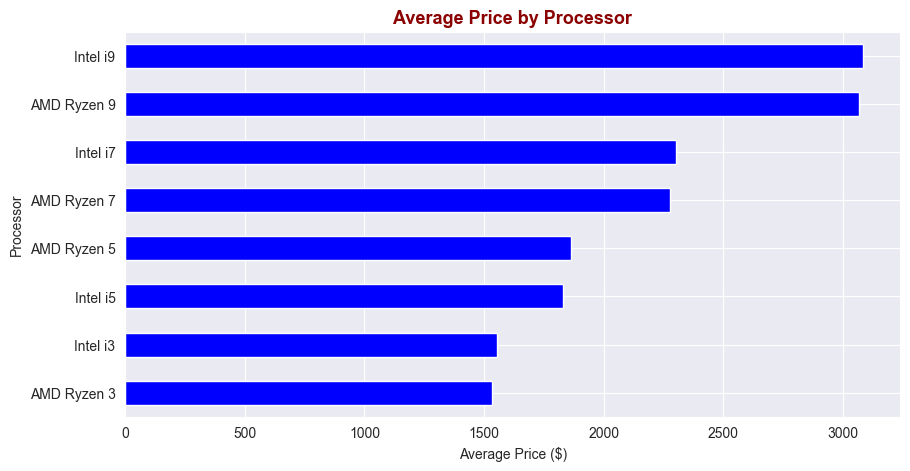

In [83]:
df_processor_price = df.groupby("Processor")["Price ($)"].mean().sort_values()
df_processor_price.plot(kind='barh', figsize=(10, 5), color='blue')
plt.title('Average Price by Processor',
          fontsize=13,
          fontweight="bold",
          color="darkred")
plt.xlabel('Average Price ($)', fontsize=10)
plt.ylabel('Processor', fontsize=10)
plt.show()

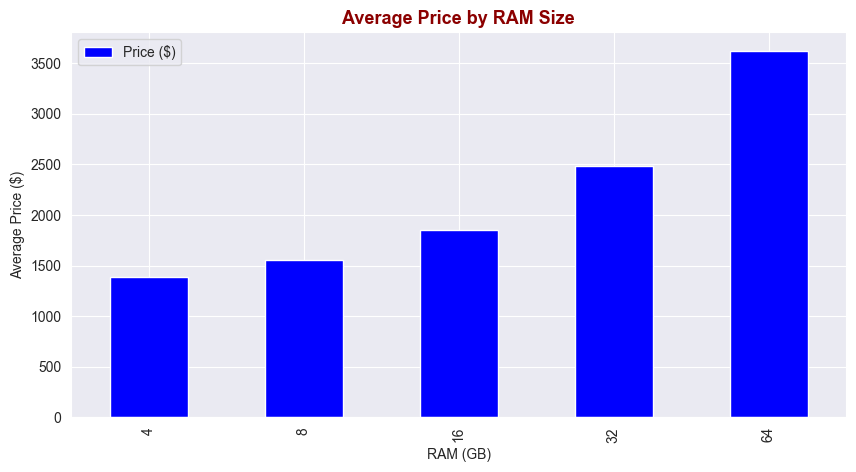

In [84]:
df_pivot = df.pivot_table(values='Price ($)', index='RAM (GB)', aggfunc='mean')
df_pivot.plot(kind='bar',
              figsize=(10, 5),
              color='blue')
plt.title('Average Price by RAM Size',
          fontsize=13,
          fontweight="bold",
          color="darkred")
plt.xlabel('RAM (GB)', fontsize=10)
plt.ylabel('Average Price ($)', fontsize=10)
plt.show()


In [85]:
! pip install nbformat

Looking in indexes: http://nexus.aiopt.io:8081/repository/repo-pypi/simple



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [86]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.colors import qualitative

In [87]:
plt.figure(figsize=(12, 10))
df_os = df['Operating System'].value_counts() 

fig = px.pie(
    df_os,
    names=df_os.index,
    values=df_os.values,
    title='Distribution of Operating Systems',
    hole=0.3, 
    color_discrete_sequence=qualitative.Pastel, 
    labels={'value': 'Count', 'name': 'Operating System'},
)

fig.update_traces(
    textinfo='percent+label',
    textfont_size=14,
    textfont_color='gray',
    marker=dict(line=dict(color='#FFFFFF', width=2))
)
fig.update_layout(
    title={
        'text': 'Distribution of Operating Systems',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=24, family='Arial, bold', color='gray')
    },
    showlegend=True,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.5,
        font=dict(color='gray')
    ),
    width=800,
    height=600,
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
)
fig.show()


<Figure size 1200x1000 with 0 Axes>

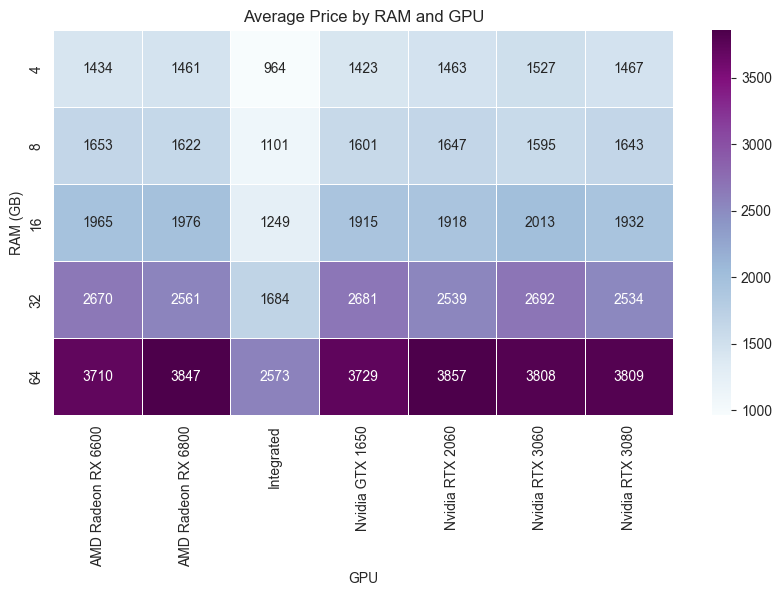

In [88]:
df_pivot3 = df.pivot_table(values='Price ($)',
                           index='RAM (GB)',
                           columns='GPU',
                           aggfunc='mean')

plt.figure(figsize=(10, 5))
sns.heatmap(df_pivot3,
            annot=True,
            cmap='BuPu',
            fmt='.0f',
            linewidths=0.5)
plt.title('Average Price by RAM and GPU')
plt.show()


In [89]:
df_processed = df.copy()


In [90]:
import re


In [91]:
def parse_storage(storage_str):
    match = re.match(r'(\d+)([A-Z]+)\s+(.*)', storage_str)
    if match:
        value = int(match.group(1))
        unit = match.group(2)

        type = match.group(3)
        if unit == 'GB':
            capacity_gb = value
        elif unit == 'TB':
            capacity_gb = value * 1000
        else:
            raise ValueError(f"Unknown unit: {unit}")
        return capacity_gb, type
    else:
        raise ValueError(f"Cannot parse storage: {storage_str}")

# Apply the function to the Storage column
df_processed['Storage_Capacity_GB'], df_processed['Storage_Type'] = zip(*df['Storage'].apply(parse_storage))

In [92]:
df_processed.tail(20)

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($),Storage_Capacity_GB,Storage_Type
11748,MSI,AMD Ryzen 3,8,2TB SSD,AMD Radeon RX 6800,17.3,1920x1080,11.5,2.38,FreeDOS,1236.47,2000,SSD
11749,Lenovo,Intel i9,4,2TB SSD,Nvidia RTX 3080,15.6,2560x1440,11.1,2.59,Linux,1955.66,2000,SSD
11750,Acer,Intel i7,32,1TB SSD,AMD Radeon RX 6600,17.3,1920x1080,7.5,2.30,macOS,2174.34,1000,SSD
11751,Apple,Intel i7,4,2TB SSD,AMD Radeon RX 6600,16.0,1366x768,6.0,3.48,Linux,1504.18,2000,SSD
11752,Asus,AMD Ryzen 7,64,1TB SSD,Nvidia RTX 3080,13.3,1920x1080,6.2,1.96,macOS,2991.53,1000,SSD
11753,Dell,Intel i9,16,512GB SSD,Nvidia RTX 3060,14.0,3840x2160,10.0,2.24,FreeDOS,3392.12,512,SSD
11754,Acer,AMD Ryzen 5,4,512GB SSD,AMD Radeon RX 6800,13.3,2560x1440,10.8,2.84,macOS,1055.47,512,SSD
11755,Dell,Intel i5,8,256GB SSD,Nvidia RTX 2060,17.3,3840x2160,7.4,1.42,Linux,1886.79,256,SSD
11756,Lenovo,AMD Ryzen 3,32,1TB HDD,Nvidia RTX 3080,15.6,2560x1440,4.3,3.34,Linux,1515.35,1000,HDD
11757,Lenovo,Intel i7,32,1TB SSD,AMD Radeon RX 6800,14.0,1366x768,9.0,2.41,Linux,1714.02,1000,SSD


In [93]:
def parse_resolution(resolution_str):
    width, height = map(int, resolution_str.split('x'))
    return width * height

df_processed['Resolution_Pixels'] = df['Resolution'].apply(parse_resolution)


In [94]:
df_processed.tail(20)

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($),Storage_Capacity_GB,Storage_Type,Resolution_Pixels
11748,MSI,AMD Ryzen 3,8,2TB SSD,AMD Radeon RX 6800,17.3,1920x1080,11.5,2.38,FreeDOS,1236.47,2000,SSD,2073600
11749,Lenovo,Intel i9,4,2TB SSD,Nvidia RTX 3080,15.6,2560x1440,11.1,2.59,Linux,1955.66,2000,SSD,3686400
11750,Acer,Intel i7,32,1TB SSD,AMD Radeon RX 6600,17.3,1920x1080,7.5,2.30,macOS,2174.34,1000,SSD,2073600
11751,Apple,Intel i7,4,2TB SSD,AMD Radeon RX 6600,16.0,1366x768,6.0,3.48,Linux,1504.18,2000,SSD,1049088
11752,Asus,AMD Ryzen 7,64,1TB SSD,Nvidia RTX 3080,13.3,1920x1080,6.2,1.96,macOS,2991.53,1000,SSD,2073600
11753,Dell,Intel i9,16,512GB SSD,Nvidia RTX 3060,14.0,3840x2160,10.0,2.24,FreeDOS,3392.12,512,SSD,8294400
11754,Acer,AMD Ryzen 5,4,512GB SSD,AMD Radeon RX 6800,13.3,2560x1440,10.8,2.84,macOS,1055.47,512,SSD,3686400
11755,Dell,Intel i5,8,256GB SSD,Nvidia RTX 2060,17.3,3840x2160,7.4,1.42,Linux,1886.79,256,SSD,8294400
11756,Lenovo,AMD Ryzen 3,32,1TB HDD,Nvidia RTX 3080,15.6,2560x1440,4.3,3.34,Linux,1515.35,1000,HDD,3686400
11757,Lenovo,Intel i7,32,1TB SSD,AMD Radeon RX 6800,14.0,1366x768,9.0,2.41,Linux,1714.02,1000,SSD,1049088


In [95]:
def split_brand_model(df, column_name):
    df[f"{column_name}_Brand"] = df[column_name].apply(lambda x: x.split()[0] if pd.notna(x) else None)
    df[f"{column_name}_Model"] = df[column_name].apply(lambda x: " ".join(x.split()[1:]) if pd.notna(x) else None)
    return df

In [96]:
df_processed = split_brand_model(df_processed, "GPU")
df_processed = split_brand_model(df_processed, "Processor")

In [97]:
df_processed.tail(5)

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($),Storage_Capacity_GB,Storage_Type,Resolution_Pixels,GPU_Brand,GPU_Model,Processor_Brand,Processor_Model
11763,Acer,Intel i3,4,2TB SSD,Nvidia RTX 2060,17.3,1366x768,11.5,1.58,macOS,704.82,2000,SSD,1049088,Nvidia,RTX 2060,Intel,i3
11764,Asus,Intel i3,4,2TB SSD,AMD Radeon RX 6800,16.0,1366x768,9.5,2.14,Linux,775.59,2000,SSD,1049088,AMD,Radeon RX 6800,Intel,i3
11765,Razer,AMD Ryzen 9,4,2TB SSD,AMD Radeon RX 6600,15.6,2560x1440,8.2,2.05,Linux,2789.46,2000,SSD,3686400,AMD,Radeon RX 6600,AMD,Ryzen 9
11766,Samsung,AMD Ryzen 7,16,512GB SSD,Integrated,13.3,1920x1080,7.5,1.48,macOS,1067.13,512,SSD,2073600,Integrated,,AMD,Ryzen 7
11767,Samsung,Intel i7,8,256GB SSD,Nvidia RTX 3080,17.3,2560x1440,6.4,2.45,FreeDOS,1579.55,256,SSD,3686400,Nvidia,RTX 3080,Intel,i7


In [98]:
#log1p = log(1+x)
df_processed["Price ($)"] = np.log1p(df_processed["Price ($)"])

In [99]:
df_processed.tail(5)

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($),Storage_Capacity_GB,Storage_Type,Resolution_Pixels,GPU_Brand,GPU_Model,Processor_Brand,Processor_Model
11763,Acer,Intel i3,4,2TB SSD,Nvidia RTX 2060,17.3,1366x768,11.5,1.58,macOS,6.559360,2000,SSD,1049088,Nvidia,RTX 2060,Intel,i3
11764,Asus,Intel i3,4,2TB SSD,AMD Radeon RX 6800,16.0,1366x768,9.5,2.14,Linux,6.654913,2000,SSD,1049088,AMD,Radeon RX 6800,Intel,i3
11765,Razer,AMD Ryzen 9,4,2TB SSD,AMD Radeon RX 6600,15.6,2560x1440,8.2,2.05,Linux,7.933962,2000,SSD,3686400,AMD,Radeon RX 6600,AMD,Ryzen 9
11766,Samsung,AMD Ryzen 7,16,512GB SSD,Integrated,13.3,1920x1080,7.5,1.48,macOS,6.973665,512,SSD,2073600,Integrated,,AMD,Ryzen 7
11767,Samsung,Intel i7,8,256GB SSD,Nvidia RTX 3080,17.3,2560x1440,6.4,2.45,FreeDOS,7.365528,256,SSD,3686400,Nvidia,RTX 3080,Intel,i7


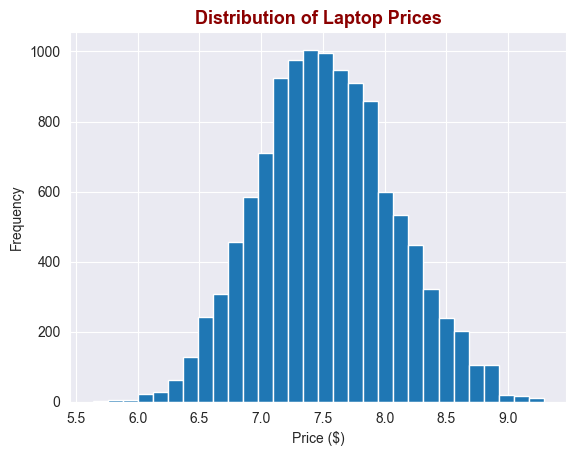

In [100]:
plt.hist(df_processed['Price ($)'], bins=30)
plt.title('Distribution of Laptop Prices',
          fontsize=13,
          fontweight="bold",
          color="darkred")
plt.xlabel('Price ($)', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.show()


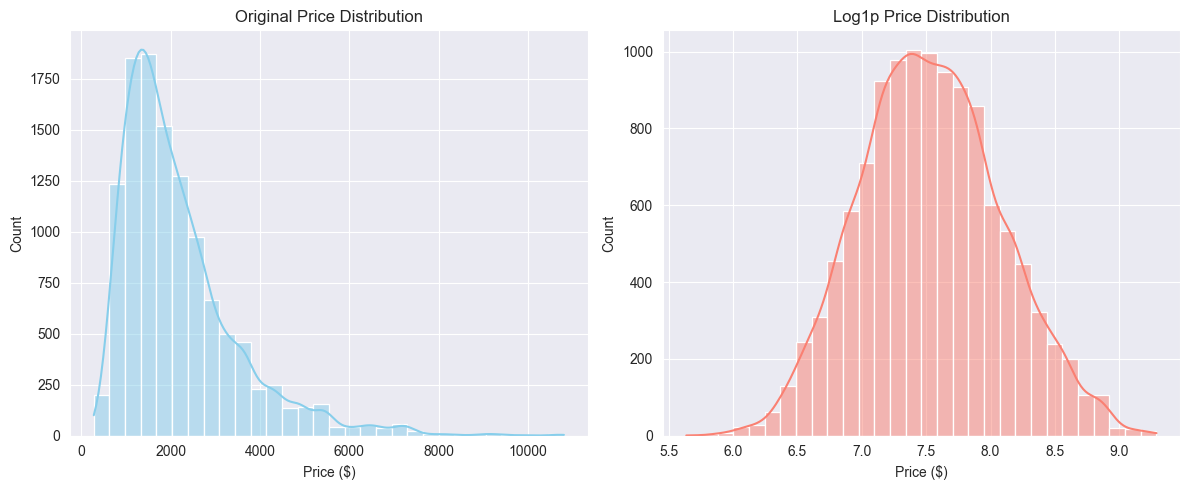

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df["Price ($)"], bins=30, kde=True, ax=axes[0], color="skyblue")
axes[0].set_title("Original Price Distribution")


sns.histplot(np.log1p(df["Price ($)"]), bins=30, kde=True, ax=axes[1], color="salmon")
axes[1].set_title("Log1p Price Distribution")

plt.tight_layout()
plt.show()


One-Hot Encoding, Ordinal Encoding, Target Encoding, Binary Encoding, Hashing Encoding

In [102]:
df_processed.dtypes

Brand                    object
Processor                object
RAM (GB)                  int64
Storage                  object
GPU                      object
Screen Size (inch)      float64
Resolution               object
Battery Life (hours)    float64
Weight (kg)             float64
Operating System         object
Price ($)               float64
Storage_Capacity_GB       int64
Storage_Type             object
Resolution_Pixels         int64
GPU_Brand                object
GPU_Model                object
Processor_Brand          object
Processor_Model          object
dtype: object

In [103]:
# نمایش همه ستون‌های categorical
categorical_cols = df_processed.select_dtypes(include=['object', 'category']).columns
print("categorical columns:")
print(categorical_cols)


categorical columns:
Index(['Brand', 'Processor', 'Storage', 'GPU', 'Resolution',
       'Operating System', 'Storage_Type', 'GPU_Brand', 'GPU_Model',
       'Processor_Brand', 'Processor_Model'],
      dtype='object')


In [104]:
def target_encode(df, column_name, target_column):
    encoding_map = df.groupby(column_name)[target_column].mean().to_dict()
    df[column_name] = df[column_name].map(encoding_map)
    return df, encoding_map

In [105]:
df_processed, gpu_encoding = target_encode(df_processed, "GPU_Model", "Price ($)")
df_processed, processor_encoding = target_encode(df_processed, "Processor_Model", "Price ($)")

In [106]:
df_processed.tail(5)

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($),Storage_Capacity_GB,Storage_Type,Resolution_Pixels,GPU_Brand,GPU_Model,Processor_Brand,Processor_Model
11763,Acer,Intel i3,4,2TB SSD,Nvidia RTX 2060,17.3,1366x768,11.5,1.58,macOS,6.559360,2000,SSD,1049088,Nvidia,7.586156,Intel,7.231214
11764,Asus,Intel i3,4,2TB SSD,AMD Radeon RX 6800,16.0,1366x768,9.5,2.14,Linux,6.654913,2000,SSD,1049088,AMD,7.599071,Intel,7.231214
11765,Razer,AMD Ryzen 9,4,2TB SSD,AMD Radeon RX 6600,15.6,2560x1440,8.2,2.05,Linux,7.933962,2000,SSD,3686400,AMD,7.599258,AMD,7.905381
11766,Samsung,AMD Ryzen 7,16,512GB SSD,Integrated,13.3,1920x1080,7.5,1.48,macOS,6.973665,512,SSD,2073600,Integrated,7.169356,AMD,7.614564
11767,Samsung,Intel i7,8,256GB SSD,Nvidia RTX 3080,17.3,2560x1440,6.4,2.45,FreeDOS,7.365528,256,SSD,3686400,Nvidia,7.579689,Intel,7.625967


In [107]:
df_processed = df_processed.drop(columns = ["Processor", "Storage", "GPU", "Resolution"])

In [108]:
categorical_features = df_processed.select_dtypes(include=["object"]).columns
dummy_df = pd.get_dummies(df_processed[categorical_features], drop_first=True, dtype='int')
df_processed = pd.concat([df_processed.drop(columns=categorical_features), dummy_df], axis=1)

In [109]:
df_processed.tail(5)

,RAM (GB),Screen Size (inch),Battery Life (hours),Weight (kg),Price ($),Storage_Capacity_GB,Resolution_Pixels,GPU_Model,Processor_Model,Brand_Apple,...,Brand_Microsoft,Brand_Razer,Brand_Samsung,Operating System_Linux,Operating System_Windows,Operating System_macOS,Storage_Type_SSD,GPU_Brand_Integrated,GPU_Brand_Nvidia,Processor_Brand_Intel
11763,4,17.3,11.5,1.58,6.559360,2000,1049088,7.586156,7.231214,0,...,0,0,0,0,0,1,1,0,1,1
11764,4,16.0,9.5,2.14,6.654913,2000,1049088,7.599071,7.231214,0,...,0,0,0,1,0,0,1,0,0,1
11765,4,15.6,8.2,2.05,7.933962,2000,3686400,7.599258,7.905381,0,...,0,1,0,1,0,0,1,0,0,0
11766,16,13.3,7.5,1.48,6.973665,512,2073600,7.169356,7.614564,0,...,0,0,1,0,0,1,1,1,0,0
11767,8,17.3,6.4,2.45,7.365528,256,3686400,7.579689,7.625967,0,...,0,0,1,0,0,0,1,0,1,1


In [110]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import (train_test_split,
                                     learning_curve)
from sklearn.metrics import (mean_squared_error,
                             mean_absolute_error,
                             r2_score)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [111]:
def plot_learning_curve(model, X, y, model_name):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    
    train_mean = -train_scores.mean(axis=1)
    test_mean = -test_scores.mean(axis=1)
    train_std = train_scores.std(axis=1)
    test_std = test_scores.std(axis=1)

    plt.figure(figsize=(7, 5))
    plt.plot(train_sizes, train_mean, label=f'{model_name} Train', color='blue')
    plt.plot(train_sizes, test_mean, label=f'{model_name} Test', color='red')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='red')
    plt.title(f'Learning Curve for {model_name}')
    plt.xlabel('Training Size')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.grid(True)
    plt.show()

In [112]:
def evaluate_model(pipeline, X, y, dataset_name):
    y_pred = pipeline.predict(X)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    print(f"\nModel Evaluation On Sets: {dataset_name}:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R-squared (R²): {r2:.4f}")

    return y_pred, mse, rmse, mae, r2



In [113]:
def plot_prediction_scatter():
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.scatter(y_train, y_train_pred, alpha=0.5)
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
    plt.xlabel('Actual Value')
    plt.ylabel('Predicted Values')
    plt.title('Train Set')

    plt.subplot(2, 2, 2)
    plt.scatter(y_val, y_val_pred, alpha=0.5)
    plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
    plt.xlabel('Actual Value')
    plt.ylabel('Predicted Values')
    plt.title('Validation Set')

    plt.subplot(2, 2, 3)
    plt.scatter(y_test, y_test_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Value')
    plt.ylabel('Predicted Values')
    plt.title('Test Set')

    # نمودار توزیع خطا
    plt.subplot(2, 2, 4)
    errors = y_test - y_test_pred
    sns.histplot(errors, kde=True)
    plt.xlabel('Prediction Error')
    plt.ylabel('Frequency')
    plt.title('Error Distribution in Test Set')

    plt.tight_layout()
    plt.show()


In [114]:
X = df_processed.drop("Price ($)", axis=1)
y = df_processed["Price ($)"]

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2


print(f"Training set size: {X_train.shape}")
print(f"Validation set size: {X_val.shape}")
print(f"Test set size: {X_test.shape}")


pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(
        n_estimators=100,
        max_depth=10,
        min_samples_split=10,
        min_samples_leaf=5,
        max_features='sqrt',
        random_state=42
    ))
])

pipeline.fit(X_train, y_train)

y_train_pred, train_mse, train_rmse, train_mae, train_r2 = evaluate_model(pipeline, X_train, y_train, "Train") # ارزیابی مدل روی Train
y_val_pred, val_mse, val_rmse, val_mae, val_r2 = evaluate_model(pipeline, X_val, y_val, "Validation") # ارزیابی مدل روی Validation
y_test_pred, test_mse, test_rmse, test_mae, test_r2 = evaluate_model(pipeline, X_test, y_test, "Test") # ارزیابی مدل روی Test


Training set size: (7060, 24)
Validation set size: (2354, 24)
Test set size: (2354, 24)

Model Evaluation On Sets: Train:
Mean Squared Error (MSE): 0.0306
Root Mean Squared Error (RMSE): 0.1750
Mean Absolute Error (MAE): 0.1378
R-squared (R²): 0.8998

Model Evaluation On Sets: Validation:
Mean Squared Error (MSE): 0.0338
Root Mean Squared Error (RMSE): 0.1838
Mean Absolute Error (MAE): 0.1442
R-squared (R²): 0.8821

Model Evaluation On Sets: Test:
Mean Squared Error (MSE): 0.0377
Root Mean Squared Error (RMSE): 0.1941
Mean Absolute Error (MAE): 0.1534
R-squared (R²): 0.8767


### Formulas

**1. R² difference between Train and Validation**

$$
\Delta R^2_{train-val} = R^2_{train} - R^2_{val}
$$

**2. R² difference between Train and Test**

$$
\Delta R^2_{train-test} = R^2_{train} - R^2_{test}
$$

**3. RMSE difference between Train and Validation**

$$
\Delta RMSE_{val-train} = RMSE_{val} - RMSE_{train}
$$

**4. RMSE difference between Train and Test**

$$
\Delta RMSE_{test-train} = RMSE_{test} - RMSE_{train}
$$

---

👉 Interpretation:

* **Large differences** → model is **overfitting** (good on training, poor on new data).
* **Small differences** → model has **good generalization**.



In [115]:
print("\nOverfitting Analysis (RandomForest Model):")
print(f"Difference in R2 between training and validation: {train_r2 - val_r2:.4f}")
print(f"Difference in R2 between training and test: {train_r2 - test_r2:.4f}")
print(f"Difference in RMSE between training and validation: {val_rmse - train_rmse:.4f}")
print(f"Difference in RMSE between training and test: {test_rmse - train_rmse:.4f}")


Overfitting Analysis (RandomForest Model):
Difference in R2 between training and validation: 0.0177
Difference in R2 between training and test: 0.0231
Difference in RMSE between training and validation: 0.0088
Difference in RMSE between training and test: 0.0191


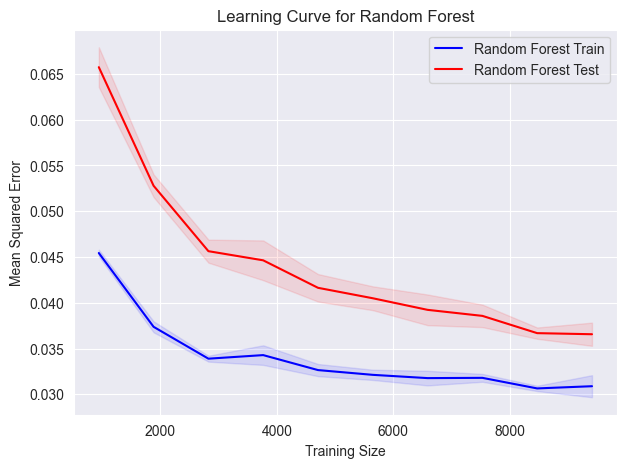

In [117]:
plot_learning_curve(pipeline, X, y, "Random Forest")


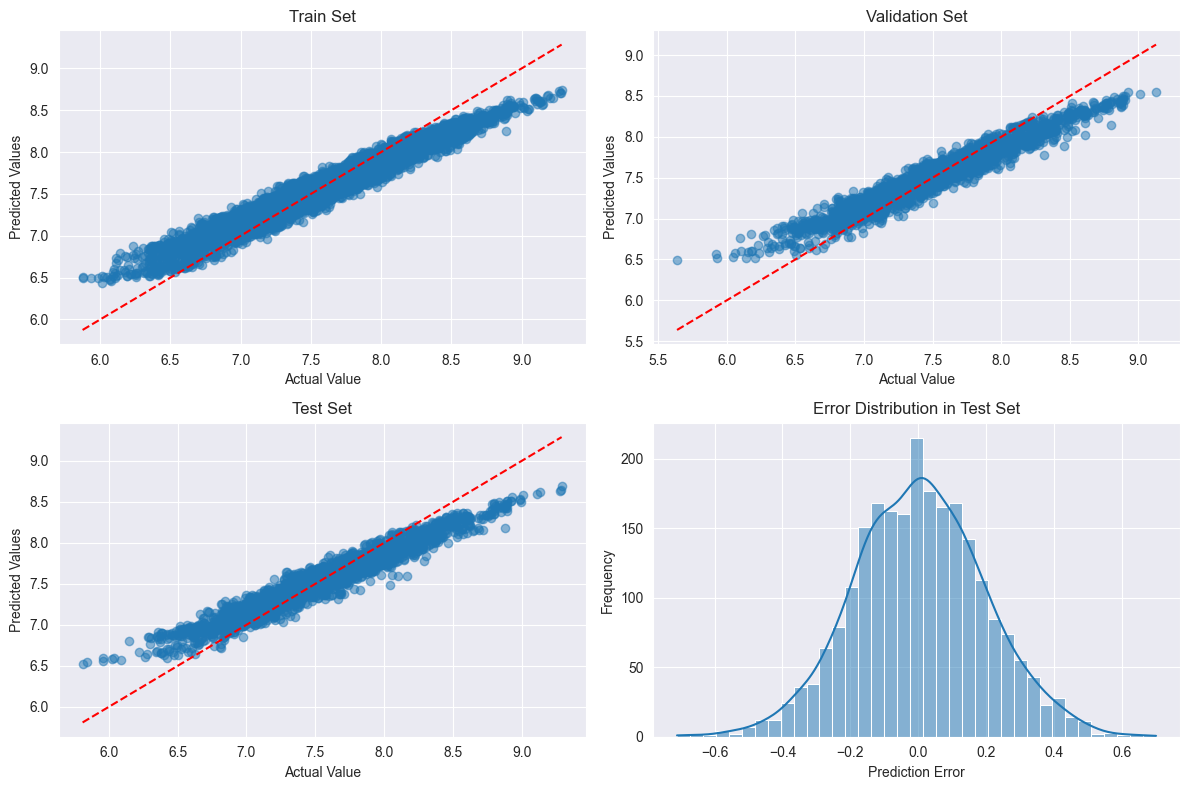

In [118]:
plot_prediction_scatter()

In [119]:
metrics = pd.DataFrame({
    'MSE': [train_mse, val_mse, test_mse],
    'RMSE': [train_rmse, val_rmse, test_rmse],
    'MAE': [train_mae, val_mae, test_mae],
    'R²': [train_r2, val_r2, test_r2]
}, index=['Train', 'Validation', 'Test'])

print("\nEvaluation Summary")
metrics


Evaluation Summary


,MSE,RMSE,MAE,R²
Train,0.030630,0.175014,0.137797,0.899782
Validation,0.033793,0.183829,0.144246,0.882117
Test,0.037694,0.194148,0.153420,0.876721


## XGBoost

In [120]:

X = df_processed.drop("Price ($)", axis=1)
y = df_processed["Price ($)"]

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Validation set size: {X_val.shape}")
print(f"Test set size: {X_test.shape}")

pipeline_xgb = Pipeline([
    ('scaler', StandardScaler()),
    ('model', XGBRegressor(
        n_estimators=100,              
        max_depth=10,                  
        learning_rate=0.1,             
        min_child_weight=5,            
        subsample=0.8,                 
        colsample_bytree=0.8,          
        reg_alpha=0.1,                 
        reg_lambda=1,                  
        gamma=0.2,                     
        objective="reg:squarederror",  
        random_state=42,
        eval_metric="rmse"
    ))
])

pipeline_xgb.fit(X_train, y_train)

Training set size: (7060, 24)
Validation set size: (2354, 24)
Test set size: (2354, 24)


,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None


In [121]:
y_train_pred, train_mse, train_rmse, train_mae, train_r2 = evaluate_model(pipeline_xgb, X_train, y_train, "Train")
y_val_pred, val_mse, val_rmse, val_mae, val_r2 = evaluate_model(pipeline_xgb, X_val, y_val, "Validation")
y_test_pred, test_mse, test_rmse, test_mae, test_r2 = evaluate_model(pipeline_xgb, X_test, y_test, "Test")


Model Evaluation On Sets: Train:
Mean Squared Error (MSE): 0.0043
Root Mean Squared Error (RMSE): 0.0655
Mean Absolute Error (MAE): 0.0503
R-squared (R²): 0.9860

Model Evaluation On Sets: Validation:
Mean Squared Error (MSE): 0.0057
Root Mean Squared Error (RMSE): 0.0752
Mean Absolute Error (MAE): 0.0577
R-squared (R²): 0.9803

Model Evaluation On Sets: Test:
Mean Squared Error (MSE): 0.0054
Root Mean Squared Error (RMSE): 0.0737
Mean Absolute Error (MAE): 0.0564
R-squared (R²): 0.9822


In [122]:
print("\nOverfitting Analysis (XGBoost Model):")
print(f"Difference in R2 between training and validation: {train_r2 - val_r2:.4f}")
print(f"Difference in R2 between training and test: {train_r2 - test_r2:.4f}")
print(f"Difference in RMSE between training and validation: {val_rmse - train_rmse:.4f}")
print(f"Difference in RMSE between training and test: {test_rmse - train_rmse:.4f}")


Overfitting Analysis (XGBoost Model):
Difference in R2 between training and validation: 0.0057
Difference in R2 between training and test: 0.0038
Difference in RMSE between training and validation: 0.0098
Difference in RMSE between training and test: 0.0083


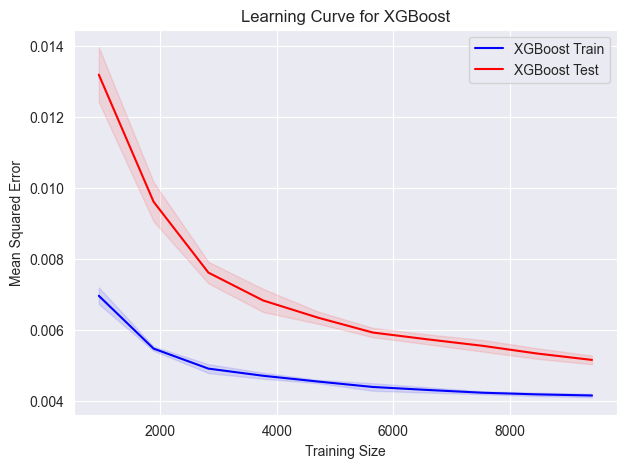

In [123]:
plot_learning_curve(pipeline_xgb, X, y, "XGBoost")

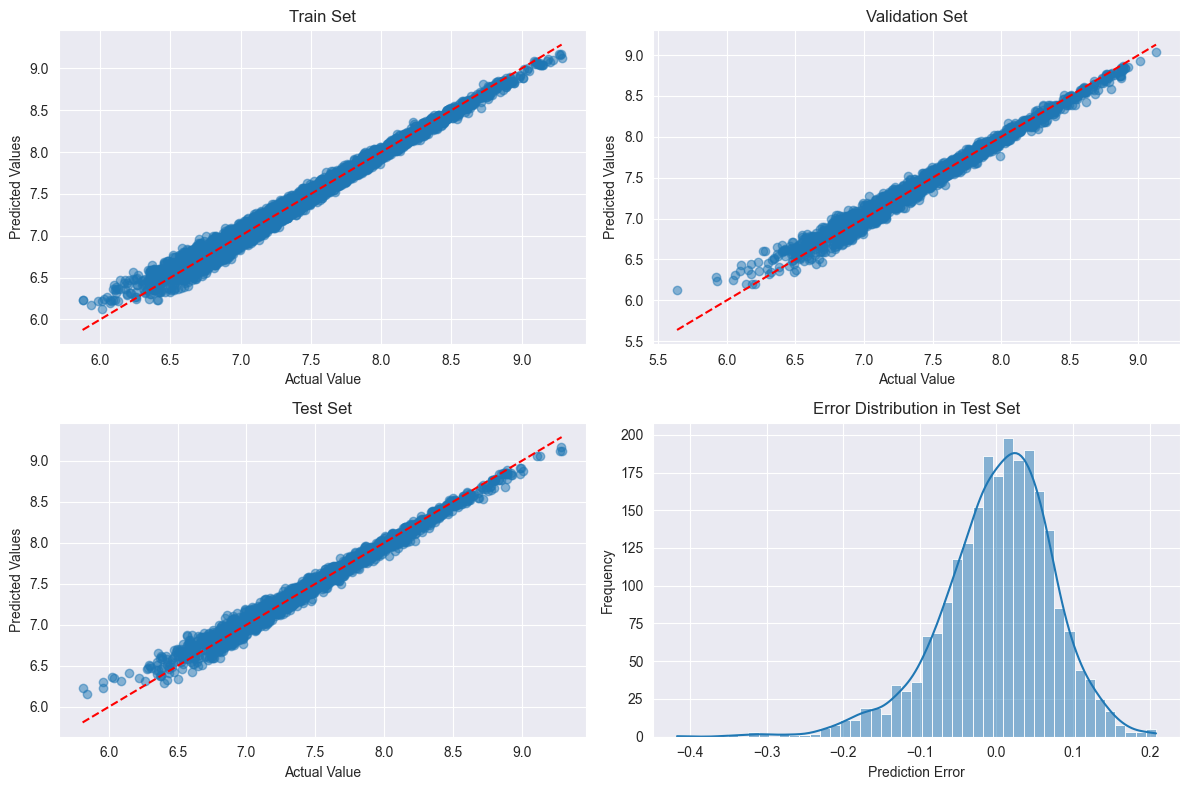

In [124]:
plot_prediction_scatter()

In [125]:

metrics = pd.DataFrame({
    'MSE': [train_mse, val_mse, test_mse],
    'RMSE': [train_rmse, val_rmse, test_rmse],
    'MAE': [train_mae, val_mae, test_mae],
    'R²': [train_r2, val_r2, test_r2]
}, index=['Train', 'Validation', 'Test'])

print("\nEvaluation Summary")
metrics


Evaluation Summary


,MSE,RMSE,MAE,R²
Train,0.004285,0.065459,0.050337,0.985980
Validation,0.005658,0.075221,0.057676,0.980262
Test,0.005436,0.073732,0.056410,0.982220


In [126]:
import joblib

joblib.dump(pipeline_xgb, "price_predictor_xgboost_tuned_model.pkl")

['price_predictor_xgboost_tuned_model.pkl']